# Proyecto Minería de Datos

**Objetivo General:** Crear un modelo con Machine Learning que pronostique tendencias, para relacionar productos que sean ideales para ventas cruzadas, en base a las transacciones de clientes.

**Dataset:** https://www.kaggle.com/mathchi/online-retail-ii-data-set-from-ml-repository

**Problema:** Para una empresa cualquiera, le es importante mejorar sus ventas o servicios de acuerdo a las necesidades del cliente. Los grandes negocios implementan procesos inteligentes acorde a las acciones de sus clientes, para lograr mejorar sus ingresos, algunos de estos procedimientos están basados en los conocimientos de marketing, Big Data, Smart Data, estadística. Sin embargo para lograr el objetivo de aumentar las ventas, es necesario tener una base de datos de las transacciones realizadas para el análisis de los datos, por tal motivo en este proyecto se enfoca en la creación de un modelo que pueda
predecir tendencias de agrupaciones de productos en base a las compras realizadas por diferentes clientes en una tienda de regalos del Reino Unido entre el 2009 y 2011.

**Tema:** Modelo de pronóstico de tendencias para ventas cruzadas de una tienda de regalos del
Reino Unido entre el 2009 a 2011

# Librerías

In [1]:
# Usada para la importación de los datos
import pandas as pd
# Usada para la graficación
import matplotlib.pyplot as plt
# Usada para la graficación
import seaborn as sns
# La escala para normalización
from sklearn.preprocessing import StandardScaler, RobustScaler
# Para la separación del dataset
from sklearn.model_selection import train_test_split
# Para selección de características
from sklearn.ensemble import RandomForestClassifier
# Para el preprocesamiento de los datos
from sklearn import preprocessing
# Para bining
import numpy as np

## Análisis de los datos

En este apartado se hace un análisis de los datos, para saber si existen datos nulos, el número de registros, distribución de los datos.

**IMPORTACIÓN DEL DATASET**

In [2]:
#Función para la lectura del dataset
def importdata():
    df = pd.read_csv('dataset/Year_2009-2011.csv',encoding='unicode_escape')
    print("\n **Estadísticas del dataset:** \n", df.describe().T)
    print("\n **Tamaño del dataset:** \n", df.shape)
    print("\n **Tipos de datos del dataset:** \n", df.dtypes)
    return df

In [3]:
df=importdata()
df


 **Estadísticas del dataset:** 
                  count          mean          std       min       25%  \
Quantity     1033036.0     10.076879   175.197628 -80995.00      1.00   
Price        1033036.0      4.613980   122.397523 -53594.36      1.25   
Customer ID   797885.0  15313.062777  1696.466663  12346.00  13964.00   

                 50%       75%      max  
Quantity         3.0     10.00  80995.0  
Price            2.1      4.15  38970.0  
Customer ID  15228.0  16788.00  18287.0  

 **Tamaño del dataset:** 
 (1033036, 8)

 **Tipos de datos del dataset:** 
 Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1033031,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1033032,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1033033,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1033034,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


**DATOS NULOS**

In [4]:
#Función para ver si existen datos nulos
def datosnull(df):
    existen_bol=1
    total_register=len(df.index)
    total_nan_values = df.isnull().sum().sum()
    existen=total_register-total_nan_values
    vars_with_na=columnan(df)
    if(existen != 0):
        print("\n ** Número de datos nulos: **\n", total_nan_values)
        print("\n ** Columnas con datos nulos: ** \n", df[vars_with_na].dtypes)
        print("\n ** Número de registros finales: ", existen ," registros de: ", len(df), " registros **")
        df=eraseregis(df)
        print(" \n Registros nulos borrados! \n")
        return existen_bol, df        
    else:
        print("\n No existen datos nulos\n ")

In [5]:
#Función para eliminación de registros con datos nulos
def eraseregis(data):
    data = data.dropna()
    return data

In [6]:
# Función para ver las columnas con datos nulos
def columnan(data):
    vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
    return vars_with_na

In [7]:
existen_bol, df_sin_nan=datosnull(df)


 ** Número de datos nulos: **
 239426

 ** Columnas con datos nulos: ** 
 Description     object
Customer ID    float64
dtype: object

 ** Número de registros finales:  793610  registros de:  1033036  registros **
 
 Registros nulos borrados! 



In [8]:
#Función para realizar algunos procesos en los datos para limpiarlos y borrar registros con errores
def limpieza(x):
    #Elimina letras del StockCode
    x['StockCode'] = x['StockCode'].replace({'[A-Z]':''}, regex=True)
    #Para convertir StockCode de objeto a numérico
    x['StockCode'] = pd.to_numeric(x['StockCode'], errors='coerce')
    print("Nuevo dataset: \n", x)
    print("Tipos de datos: \n", x.dtypes)
    return x

In [9]:
# Función que convierte a enteros después de eliminar datos nulos 
def eliminaregistros(x):
    #Elimina los registros que tenga valor NaN
    existen_bol, df_sin_nan = datosnull(x)
    #Convierte a entero
    df_sin_nan=df_sin_nan.astype(int)
    print("Nuevo dataset: \n", df_sin_nan)
    print("Tipos de datos: \n", df_sin_nan.dtypes)
    return df_sin_nan

In [10]:
x=limpieza(df_sin_nan)

<ipython-input-8-54134e58bcae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['StockCode'] = x['StockCode'].replace({'[A-Z]':''}, regex=True)


Nuevo dataset: 
         Invoice  StockCode                          Description  Quantity  \
0        489434    85048.0  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323.0                   PINK CHERRY LIGHTS        12   
2        489434    79323.0                  WHITE CHERRY LIGHTS        12   
3        489434    22041.0         RECORD FRAME 7" SINGLE SIZE         48   
4        489434    21232.0       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...        ...                                  ...       ...   
1033031  581587    22899.0         CHILDREN'S APRON DOLLY GIRL          6   
1033032  581587    23254.0        CHILDRENS CUTLERY DOLLY GIRL          4   
1033033  581587    23255.0      CHILDRENS CUTLERY CIRCUS PARADE         4   
1033034  581587    22138.0        BAKING SET 9 PIECE RETROSPOT          3   
1033035  581587        NaN                              POSTAGE         1   

             InvoiceDate  Price  Customer ID         Count

<ipython-input-8-54134e58bcae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['StockCode'] = pd.to_numeric(x['StockCode'], errors='coerce')


In [11]:
existen_bol, df_sin_nan=datosnull(x)


 ** Número de datos nulos: **
 3387

 ** Columnas con datos nulos: ** 
 StockCode    float64
dtype: object

 ** Número de registros finales:  794498  registros de:  797885  registros **
 
 Registros nulos borrados! 



In [12]:
# Se crea el conteo de los registros repetidos en descripción
dups = df_sin_nan.pivot_table(index=['Description'], aggfunc ='size') 
# Se crea un data frame y se añade la columna 'Repeticion'
gh = pd.DataFrame(dups, columns=['Repeticion'])
# Se observa el número de repeticiones de Descripción en orden
by_repet = gh.sort_values('Repeticion',ascending=False)
by_repet.head(50)

,Repeticion
Description,
WHITE HANGING HEART T-LIGHT HOLDER,5149
REGENCY CAKESTAND 3 TIER,3678
JUMBO BAG RED RETROSPOT,2713
ASSORTED COLOUR BIRD ORNAMENT,2709
PARTY BUNTING,2121
LUNCH BAG BLACK SKULL.,2089
STRAWBERRY CERAMIC TRINKET BOX,2040
BAKING SET 9 PIECE RETROSPOT,1961
REX CASH+CARRY JUMBO SHOPPER,1959


In [13]:
df_sin_nan.dtypes

Invoice         object
StockCode      float64
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [14]:
# Seleccionar todas las columnas de tipo objeto
df_sin_nan_2 = df_sin_nan.select_dtypes(include=[object])
df_sin_nan_2.head(3)

,Invoice,Description,InvoiceDate,Country
0,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12/1/2009 7:45,United Kingdom
1,489434,PINK CHERRY LIGHTS,12/1/2009 7:45,United Kingdom
2,489434,WHITE CHERRY LIGHTS,12/1/2009 7:45,United Kingdom


In [15]:
# Comprobar las columnas que se cogen que sean de tipo objeto
df_sin_nan_2.columns

Index(['Invoice', 'Description', 'InvoiceDate', 'Country'], dtype='object')

In [16]:
# Transofmración de datos categóricos a numéricos
le = preprocessing.LabelEncoder()
# Se transforman todas las columnas
X_2 = df_sin_nan_2.apply(le.fit_transform)
X_2

,Invoice,Description,InvoiceDate,Country
0,0,60,12205,38
1,0,3288,12205,38
2,0,35,12205,38
3,0,3618,12205,38
4,0,4614,12205,38
...,...,...,...,...
1033030,36617,3049,16142,13
1033031,36617,967,16142,13
1033032,36617,976,16142,13
1033033,36617,975,16142,13


In [17]:
# Selección de columnas para el primer conjunto de datos
columns_use = ["StockCode","Quantity","Price","Customer ID"]

In [18]:
df_2 = df_sin_nan[columns_use]
df_2

,StockCode,Quantity,Price,Customer ID
0,85048.0,12,6.95,13085.0
1,79323.0,12,6.75,13085.0
2,79323.0,12,6.75,13085.0
3,22041.0,48,2.10,13085.0
4,21232.0,24,1.25,13085.0
...,...,...,...,...
1033030,22613.0,12,0.85,12680.0
1033031,22899.0,6,2.10,12680.0
1033032,23254.0,4,4.15,12680.0
1033033,23255.0,4,4.15,12680.0


In [19]:
# Unión de los dos conjuntos de datos
def uniondatos(df_1, df_2):
    df_unido = pd.concat([df_1, df_2], axis=1,)
    return df_unido

In [20]:
# Unión de los dos conjuntos de datos
df_unido = uniondatos(df_2, X_2)
df_unido

,StockCode,Quantity,Price,Customer ID,Invoice,Description,InvoiceDate,Country
0,85048.0,12,6.95,13085.0,0,60,12205,38
1,79323.0,12,6.75,13085.0,0,3288,12205,38
2,79323.0,12,6.75,13085.0,0,35,12205,38
3,22041.0,48,2.10,13085.0,0,3618,12205,38
4,21232.0,24,1.25,13085.0,0,4614,12205,38
...,...,...,...,...,...,...,...,...
1033030,22613.0,12,0.85,12680.0,36617,3049,16142,13
1033031,22899.0,6,2.10,12680.0,36617,967,16142,13
1033032,23254.0,4,4.15,12680.0,36617,976,16142,13
1033033,23255.0,4,4.15,12680.0,36617,975,16142,13


In [21]:
df_int=df_unido[["StockCode","Customer ID"]].astype(int)

In [22]:
df_unido=df_unido.drop(['StockCode'], axis=1)
df_unido=df_unido.drop(['Customer ID'], axis=1)

In [23]:
df_unido=uniondatos(df_int, df_unido)
df_unido

,StockCode,Customer ID,Quantity,Price,Invoice,Description,InvoiceDate,Country
0,85048,13085,12,6.95,0,60,12205,38
1,79323,13085,12,6.75,0,3288,12205,38
2,79323,13085,12,6.75,0,35,12205,38
3,22041,13085,48,2.10,0,3618,12205,38
4,21232,13085,24,1.25,0,4614,12205,38
...,...,...,...,...,...,...,...,...
1033030,22613,12680,12,0.85,36617,3049,16142,13
1033031,22899,12680,6,2.10,36617,967,16142,13
1033032,23254,12680,4,4.15,36617,976,16142,13
1033033,23255,12680,4,4.15,36617,975,16142,13


In [24]:
# Separado para realizar la estandarización
for_standa = pd.DataFrame(df_unido[['Quantity','Price']])

In [25]:
df_unido=df_unido.drop(['Quantity'], axis=1)
df_unido=df_unido.drop(['Price'], axis=1)

In [26]:
df_unido

,StockCode,Customer ID,Invoice,Description,InvoiceDate,Country
0,85048,13085,0,60,12205,38
1,79323,13085,0,3288,12205,38
2,79323,13085,0,35,12205,38
3,22041,13085,0,3618,12205,38
4,21232,13085,0,4614,12205,38
...,...,...,...,...,...,...
1033030,22613,12680,36617,3049,16142,13
1033031,22899,12680,36617,967,16142,13
1033032,23254,12680,36617,976,16142,13
1033033,23255,12680,36617,975,16142,13


**DIVISIÓN DE CARACTERÍSTICAS**

In [27]:
#División del dataset, en conjunto de datos de entrenamiento y otro conjunto para las pruebas
def slipdata(df, nombreColumna):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(nombreColumna, axis=1), df[nombreColumna], test_size=0.3, random_state=109)
    return X_train, X_test, y_train, y_test

In [28]:
#Estandarización de la columna Price
def estandarizacion(df_unido, nombreColumna):
    Standariza=(df_unido[nombreColumna]-df_unido[nombreColumna].mean())/df_unido[nombreColumna].std()
    Standariza = pd.DataFrame(Standariza)
    return Standariza

In [29]:
Standariza_precio=estandarizacion(for_standa, 'Price')
Standariza_Quantity=estandarizacion(for_standa, 'Quantity')

In [30]:
#Unión de datos estandarizados con los actuales
data_unido2=uniondatos(Standariza_precio, Standariza_Quantity)

In [31]:
data_unido3=uniondatos(df_unido, data_unido2)
data_unido3

,StockCode,Customer ID,Invoice,Description,InvoiceDate,Country,Price,Quantity
0,85048,13085,0,60,12205,38,0.863970,-0.003379
1,79323,13085,0,3288,12205,38,0.820365,-0.003379
2,79323,13085,0,35,12205,38,0.820365,-0.003379
3,22041,13085,0,3618,12205,38,-0.193448,0.184077
4,21232,13085,0,4614,12205,38,-0.378769,0.059106
...,...,...,...,...,...,...,...,...
1033030,22613,12680,36617,3049,16142,13,-0.465979,-0.003379
1033031,22899,12680,36617,967,16142,13,-0.193448,-0.034621
1033032,23254,12680,36617,976,16142,13,0.253502,-0.045035
1033033,23255,12680,36617,975,16142,13,0.253502,-0.045035


In [34]:
X_train, X_test, y_train, y_test=slipdata(data_unido3, 'Customer ID')

**SELECCIÓN DE CARACTERÍSTICAS**

In [ ]:
RF = RandomForestClassifier(max_depth=7, n_estimators=100)
RF.fit(X_train, y_train)
y_pred_RF= RF.predict(X_test)

df_3 = pd.DataFrame()

cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Top 1 Feature Predictor",
        "Top 2 Feature Predictor",
        "Top 3 Feature Predictor",
        "Top 4 Feature Predictor",
        "Top 5 Feature Predictor"]

df_3.loc['Machine Learning Classification Method', 
       'Details'] = 'Random Forest Classifier'
df_3.loc['Train Accuracy', 'Details'] = RF.score(X_train, y_train) 
df_3.loc['Test Accuracy', 'Details'] = RF.score(X_test, y_test)

#random forest para selección de características

feature_importances = X.columns[np.argsort(RF.feature_importances_)][-5:]
df_3.loc['Top 1 Feature Predictor', 'Details'] = feature_importances[4]
df_3.loc['Top 2 Feature Predictor', 'Details'] = feature_importances[3]
df_3.loc['Top 3 Feature Predictor', 'Details'] = feature_importances[2]
df_3.loc['Top 4 Feature Predictor', 'Details'] = feature_importances[1]
df_3.loc['Top 5 Feature Predictor', 'Details'] = feature_importances[0]

display(df_3)

<AxesSubplot:>

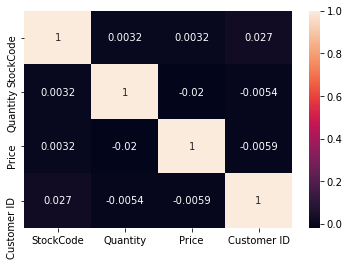

In [32]:
sns.heatmap(df_sin_nan.corr(), annot=True)

<AxesSubplot:>

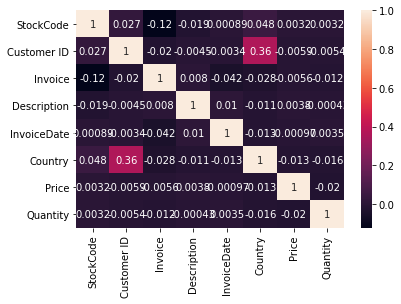

In [33]:
sns.heatmap(data_unido3.corr(), annot=True)

<AxesSubplot:>

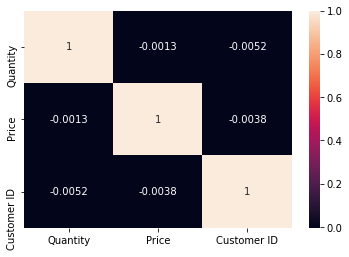

In [4]:
sns.heatmap(df.corr(), annot=True)

# Creación del archivo del dataset

In [36]:
# Creación del archivo
data_unido3.to_csv(r'C:\Users\Usuario\data mining\ProMD\dataset\ProMD.csv', index = False)

In [38]:
df_f2 = pd.read_csv('dataset/ProMD.csv')

In [39]:
df_f2

,StockCode,Customer ID,Invoice,Description,InvoiceDate,Country,Price,Quantity
0,85048,13085,0,60,12205,38,0.863970,-0.003379
1,79323,13085,0,3288,12205,38,0.820365,-0.003379
2,79323,13085,0,35,12205,38,0.820365,-0.003379
3,22041,13085,0,3618,12205,38,-0.193448,0.184077
4,21232,13085,0,4614,12205,38,-0.378769,0.059106
...,...,...,...,...,...,...,...,...
794493,22613,12680,36617,3049,16142,13,-0.465979,-0.003379
794494,22899,12680,36617,967,16142,13,-0.193448,-0.034621
794495,23254,12680,36617,976,16142,13,0.253502,-0.045035
794496,23255,12680,36617,975,16142,13,0.253502,-0.045035


In [44]:
df_f2

,StockCode,Customer ID,Invoice,Description,InvoiceDate,Country,Price,Quantity
0,85048,13085,0,60,12205,38,0.863970,-0.003379
1,79323,13085,0,3288,12205,38,0.820365,-0.003379
2,79323,13085,0,35,12205,38,0.820365,-0.003379
3,22041,13085,0,3618,12205,38,-0.193448,0.184077
4,21232,13085,0,4614,12205,38,-0.378769,0.059106
...,...,...,...,...,...,...,...,...
794493,22613,12680,36617,3049,16142,13,-0.465979,-0.003379
794494,22899,12680,36617,967,16142,13,-0.193448,-0.034621
794495,23254,12680,36617,976,16142,13,0.253502,-0.045035
794496,23255,12680,36617,975,16142,13,0.253502,-0.045035
